In [17]:
# 1. Import libraries
import os                      # Work with folders and files
import pandas as pd            # Data handling
import numpy as np             # Numerical operations
import matplotlib.pyplot as plt  # Plotting

# 2. Define the folder that contains all cleaned CSV files
data_folder = "cleaned_stocks"   # Adjust if your folder has a different name

# 3. List files in the cleaned_stocks folder
print("Files in cleaned_stocks folder:")
print(os.listdir(data_folder))   # Show all files to verify they are visible


Files in cleaned_stocks folder:
['.ipynb_checkpoints', 'ACCP_clean.csv', 'AIRP_clean.csv', 'AIR_clean.csv', 'AXAF_clean.csv', 'BNPP_clean.csv', 'BOUY_clean.csv', 'BVI_clean.csv', 'CAC40_clean.csv', 'CAGR_clean.csv', 'CAPP_clean.csv', 'CARR_clean.csv', 'DANO_clean.csv', 'DAST_clean.csv', 'EDEN_clean.csv', 'ENGIE_clean.csv', 'ESLX_clean.csv', 'EUFI_clean.csv', 'HRMS_clean.csv', 'LEGD_clean.csv', 'LVMH_clean.csv', 'MICP_clean.csv', 'MT_clean.csv', 'ORAN_clean.csv', 'OREP_clean.csv', 'PERP_clean.csv', 'PRTP_clean.csv', 'PUBP_clean.csv', 'RENA_clean.csv', 'SAF_clean.csv', 'SASY_clean.csv', 'SCHN_clean.csv', 'SGEF_clean.csv', 'SGOB_clean.csv', 'SOGN_clean.csv', 'STLA_clean.csv', 'STMPA_clean.csv', 'TCFP_clean.csv', 'TEPRF_clean.csv', 'TTEF_clean.csv', 'URW_clean.csv', 'VIE_clean.csv']


In [18]:
# 4. Load all *_clean.csv files into a dictionary of DataFrames

stocks = {}   # Dictionary: key = ticker, value = DataFrame

for filename in os.listdir(data_folder):
    if filename.endswith("_clean.csv"):                           # Only cleaned CSV files
        ticker = filename.replace("_clean.csv", "")               # Ticker name (e.g. 'ACCP', 'CAC40')
        path = os.path.join(data_folder, filename)                # Full path to the file

        df_tmp = pd.read_csv(path, parse_dates=["date"])          # Read CSV and parse 'date'
        df_tmp = df_tmp.sort_values("date").reset_index(drop=True)  # Sort by date

        stocks[ticker] = df_tmp                                   # Store DataFrame in dictionary

# 5. Show loaded tickers
print("Loaded tickers:")
print(list(stocks.keys()))


Loaded tickers:
['ACCP', 'AIRP', 'AIR', 'AXAF', 'BNPP', 'BOUY', 'BVI', 'CAC40', 'CAGR', 'CAPP', 'CARR', 'DANO', 'DAST', 'EDEN', 'ENGIE', 'ESLX', 'EUFI', 'HRMS', 'LEGD', 'LVMH', 'MICP', 'MT', 'ORAN', 'OREP', 'PERP', 'PRTP', 'PUBP', 'RENA', 'SAF', 'SASY', 'SCHN', 'SGEF', 'SGOB', 'SOGN', 'STLA', 'STMPA', 'TCFP', 'TEPRF', 'TTEF', 'URW', 'VIE']


In [19]:
# 6. Compute daily returns for each ticker and keep only (date + return)

returns_dict = {}   # Dictionary: key = ticker, value = DataFrame with date + returns

for ticker, df_tmp in stocks.items():

    # Compute daily returns from close price
    df_tmp["return"] = df_tmp["close"].pct_change()

    # Drop first NaN created by pct_change
    df_tmp = df_tmp.dropna().copy()

    # Keep only 'date' and the return column renamed with the ticker name
    returns_dict[ticker] = df_tmp[["date", "return"]].rename(columns={"return": ticker})

# Quick check on one ticker (for example CAC40)
print("Example - first rows of CAC40 returns:")
print(returns_dict["CAC40"].head())


Example - first rows of CAC40 returns:
        date     CAC40
1 2015-01-05 -0.033142
2 2015-01-06 -0.006776
3 2015-01-07  0.007158
4 2015-01-08  0.035855
5 2015-01-09 -0.019041


In [20]:
# 7. Initialize the returns matrix using CAC40 as the base series

returns_matrix = returns_dict["CAC40"].copy()    # Start with CAC40 returns
# returns_matrix columns: ['date', 'CAC40']

# 8. Merge all other tickers on 'date'
for ticker, df_ret in returns_dict.items():
    if ticker != "CAC40":                        # Skip CAC40, already used as base
        returns_matrix = returns_matrix.merge(df_ret, on="date", how="inner")

# 9. Set 'date' as index for time series format
returns_matrix = returns_matrix.set_index("date")

# 10. Check shape and first rows of the returns matrix
print("Shape of returns matrix (rows, columns):", returns_matrix.shape)
returns_matrix.head()


Shape of returns matrix (rows, columns): (1741, 41)


CAC40      ACCP      AIRP       AIR      AXAF      BNPP  \
date                                                                     
2018-12-27 -0.006005 -0.016022 -0.018195  0.005793 -0.012254 -0.006187   
2018-12-28  0.017425  0.023021  0.013328  0.020221  0.012945  0.021530   
2018-12-31  0.011103  0.018386  0.020669  0.002402  0.004260  0.002539   
2019-01-02 -0.008730 -0.013743 -0.021723  0.002516 -0.002651 -0.009878   
2019-01-03 -0.016612 -0.016393 -0.018316 -0.035262 -0.008506 -0.006140   

                BOUY       BVI      CAGR      CAPP  ...      SGEF      SGOB  \
date                                                ...                       
2018-12-27 -0.021029 -0.013211 -0.012917  0.006177  ...  0.001986 -0.007752   
2018-12-28  0.024124  0.012224  0.026172  0.014404  ...  0.018686  0.029830   
2018-12-31  0.011294  0.023577  0.002125  0.010242  ...  0.000834  0.005517   
2019-01-02 -0.028717 -0.016854 -0.012725 -0.029263  ... -0.008053 -0.013032   
2019-01-03 -0.009198 -0.028571 -0.003222 -0.052931  ... -0.003359 -0.008687   

                SOGN      STLA     STMPA      TCFP     TEPRF      TTEF  \
date                                                                     
2018-12-27 -0.014488 -0.003835  0.001688  0.000807  0.008962  0.002653   
2018-12-28  0.021683  0.008662  0.030329  0.015924  0.021466  0.016318   
2018-12-31  0.000719  0.020992  0.020442  0.011905  0.011594  0.001953   
2019-01-02 -0.014019 -0.028037 -0.027244 -0.002941 -0.007880  0.010394   
2019-01-03  0.000365 -0.005769 -0.116145 -0.024385 -0.033935 -0.008573   

                 URW       VIE  
date                            
2018-12-27 -0.015906 -0.027666  
2018-12-28  0.006495  0.015412  
2018-12-31  0.016059  0.010508  
2019-01-02 -0.020532 -0.008666  
2019-01-03  0.005127 -0.006993  

[5 rows x 41 columns]

In [5]:
# A. Compute full correlation matrix for all tickers
correlation_matrix = returns_matrix.corr()

# Display the first rows of the matrix
correlation_matrix.head()


CAC40      ACCP      AIRP       AIR      AXAF      BNPP      BOUY  \
CAC40  1.000000  0.687073  0.728941  0.731267  0.780540  0.766836  0.689302   
ACCP   0.687073  1.000000  0.390738  0.666441  0.585890  0.613868  0.568505   
AIRP   0.728941  0.390738  1.000000  0.433764  0.535538  0.458138  0.482792   
AIR    0.731267  0.666441  0.433764  1.000000  0.582591  0.605862  0.589994   
AXAF   0.780540  0.585890  0.535538  0.582591  1.000000  0.729357  0.625338   

            BVI      CAGR      CAPP  ...      SGEF      SGOB      SOGN  \
CAC40  0.641099  0.733066  0.650773  ...  0.789403  0.763594  0.724422   
ACCP   0.434452  0.599955  0.448166  ...  0.643685  0.539166  0.593244   
AIRP   0.535939  0.453539  0.475672  ...  0.568925  0.543840  0.419164   
AIR    0.462140  0.576276  0.463038  ...  0.662056  0.536366  0.579030   
AXAF   0.490140  0.715646  0.490663  ...  0.685961  0.623437  0.708435   

           STLA     STMPA      TCFP     TEPRF      TTEF       URW       VIE  
CAC40  0.710650  0.630544  0.454725  0.375603  0.662246  0.549105  0.672174  
ACCP   0.549799  0.426214  0.382029  0.237340  0.495861  0.542473  0.484830  
AIRP   0.450998  0.448749  0.332342  0.300831  0.396119  0.337835  0.506275  
AIR    0.542153  0.419989  0.524595  0.262480  0.502190  0.517285  0.504892  
AXAF   0.567910  0.427369  0.416762  0.276825  0.610142  0.497699  0.565872  

[5 rows x 41 columns]

In [6]:
# B. Extract correlation with CAC40 and sort from highest to lowest
corr_with_cac40 = correlation_matrix["CAC40"].sort_values(ascending=False)

print("Correlation of each stock with CAC40:")
print(corr_with_cac40)


Correlation of each stock with CAC40:
CAC40    1.000000
SGEF     0.789403
LVMH     0.785594
AXAF     0.780540
SCHN     0.773604
BNPP     0.766836
SGOB     0.763594
SAF      0.751561
CAGR     0.733066
AIR      0.731267
AIRP     0.728941
SOGN     0.724422
STLA     0.710650
HRMS     0.693696
PRTP     0.692220
BOUY     0.689302
LEGD     0.688222
ACCP     0.687073
ESLX     0.685717
MT       0.678428
OREP     0.672183
VIE      0.672174
MICP     0.669082
TTEF     0.662246
CAPP     0.650773
RENA     0.644776
BVI      0.641099
STMPA    0.630544
PUBP     0.609104
PERP     0.589328
ENGIE    0.581408
URW      0.549105
EDEN     0.526956
DAST     0.515540
DANO     0.457677
TCFP     0.454725
SASY     0.417728
ORAN     0.386983
TEPRF    0.375603
CARR     0.362841
EUFI     0.331486
Name: CAC40, dtype: float64


In [7]:
# C. Plot correlation heatmap
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix Heatmap of CAC40 Stocks")
plt.tight_layout()
plt.show()


In [8]:
# D. Compute beta and R² for each stock relative to CAC40
import statsmodels.api as sm

betas = {}    # store beta per stock
alphas = {}   # store alpha per stock
r2_scores = {}  # store R² per stock

# The market return (CAC40)
market = returns_matrix["CAC40"]

# Loop over each stock (except CAC40)
for ticker in returns_matrix.columns:
    if ticker == "CAC40":
        continue
    
    stock = returns_matrix[ticker]
    
    # Add constant for regression
    X = sm.add_constant(market)
    
    # Fit linear regression
    model = sm.OLS(stock, X).fit()
    
    # Store values
    alphas[ticker] = model.params["const"]
    betas[ticker] = model.params["CAC40"]
    r2_scores[ticker] = model.rsquared

# Convert results to DataFrame
beta_table = pd.DataFrame({
    "Alpha": alphas,
    "Beta": betas,
    "R_squared": r2_scores
})

print("Beta and R² for each stock relative to CAC40:")
beta_table


Beta and R² for each stock relative to CAC40:


Alpha      Beta  R_squared
ACCP  -0.000174  1.245207   0.472070
AIRP   0.000223  0.779726   0.531355
AIR    0.000264  1.456231   0.534752
AXAF   0.000163  1.067721   0.609243
BNPP   0.000095  1.335926   0.588038
BOUY  -0.000105  0.977075   0.475138
BVI    0.000056  0.779027   0.411008
CAGR   0.000070  1.187750   0.537385
CAPP  -0.000006  1.037424   0.423505
CARR  -0.000123  0.489810   0.131654
DANO   0.000009  0.475518   0.209468
DAST   0.000080  0.774161   0.265782
EDEN  -0.000379  0.825285   0.277682
ENGIE  0.000124  0.748832   0.338035
ESLX   0.000302  0.922191   0.470208
EUFI   0.000394  0.587143   0.109883
HRMS   0.000624  0.966686   0.481215
LEGD   0.000401  0.911187   0.473650
LVMH   0.000158  1.209664   0.617158
MICP  -0.000103  0.955863   0.447670
MT     0.000132  1.540329   0.460264
ORAN  -0.000099  0.382348   0.149756
OREP   0.000150  0.841560   0.451829
PERP  -0.000482  0.704933   0.347308
PRTP  -0.000381  1.231512   0.479169
PUBP   0.000114  0.983857   0.371007
RENA  -0.000458  1.467664   0.415737
SAF    0.000338  1.428664   0.564844
SASY  -0.000012  0.501173   0.174497
SCHN   0.000547  1.167198   0.598464
SGEF   0.000016  1.160000   0.623158
SGOB   0.000371  1.267675   0.583076
SOGN   0.000134  1.515753   0.524787
STLA  -0.000375  1.427725   0.505024
STMPA  0.000252  1.328584   0.397586
TCFP   0.000454  0.711162   0.206775
TEPRF -0.000394  0.787504   0.141077
TTEF  -0.000158  1.007915   0.438570
URW   -0.000334  1.320272   0.301516
VIE    0.000075  0.952709   0.451818

In [9]:
# E. Prepare PCA input by removing CAC40
X = returns_matrix.drop(columns=["CAC40"])

# Check shape
print("PCA input shape:", X.shape)


PCA input shape: (1741, 40)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardized PCA matrix shape:", X_scaled.shape)


Standardized PCA matrix shape: (1741, 40)


In [11]:
from sklearn.decomposition import PCA

# Fit PCA (keep all components)
pca = PCA()
pca.fit(X_scaled)

# Explained variance by each component
explained_var = pca.explained_variance_ratio_

print("Explained variance ratio:")
print(explained_var)


Explained variance ratio:
[0.43020524 0.06707951 0.04571989 0.03135842 0.03051344 0.02275129
 0.02146371 0.0201003  0.01887091 0.01843393 0.01749289 0.01619513
 0.01588252 0.01529679 0.01473913 0.01408194 0.01326799 0.01267315
 0.01182866 0.01170822 0.01150568 0.01095382 0.01074216 0.01027412
 0.00992046 0.00935285 0.00899692 0.00868746 0.00840163 0.00780908
 0.00722797 0.00699374 0.00671728 0.00663889 0.00546528 0.00482409
 0.00437355 0.00405017 0.00399945 0.00340235]


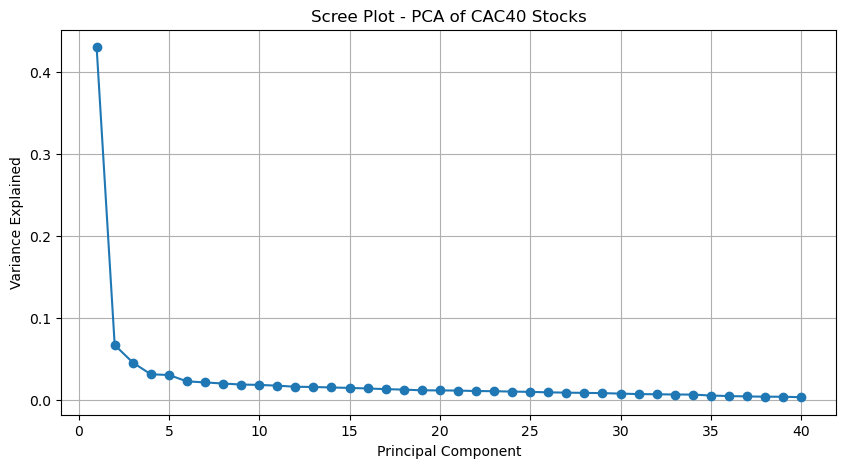

In [12]:
# H. Scree plot (variance explained per component)
plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Scree Plot - PCA of CAC40 Stocks")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()


In [13]:
# PCA loadings: each row corresponds to a stock, each column to a PC
loadings = pca.components_.T   # shape: (n_stocks, n_components)

# Build DataFrame: index = stock tickers, columns = PC1, PC2
pca_df = pd.DataFrame(
    loadings[:, :2],                 # take first two principal components
    index=X.columns,                 # stock tickers
    columns=["PC1", "PC2"]           # names of components
)

print("PCA coordinates (stocks in PC1-PC2 space):")
pca_df.head()


PCA coordinates (stocks in PC1-PC2 space):


PC1       PC2
ACCP  0.176211 -0.117388
AIRP  0.169782  0.145773
AIR   0.179136 -0.111364
AXAF  0.193734 -0.134875
BNPP  0.192687 -0.194495

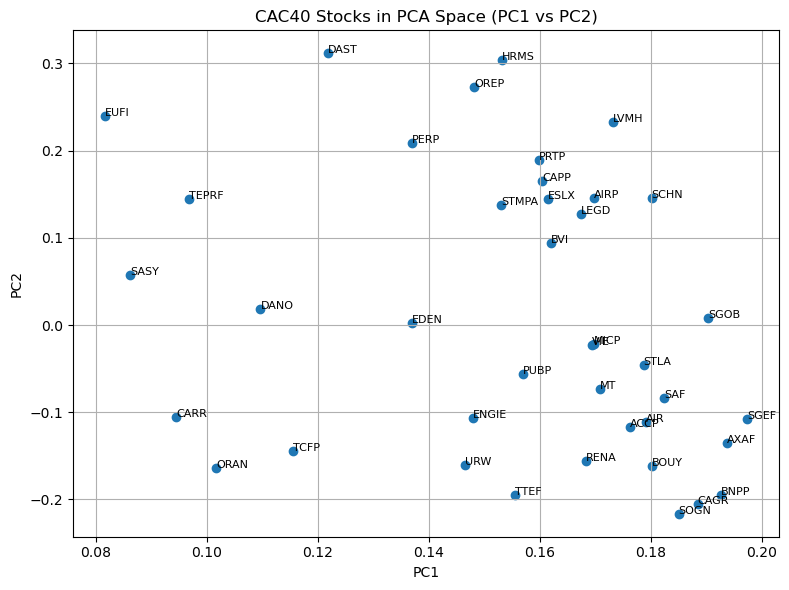

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"])

for ticker in pca_df.index:
    plt.text(pca_df.loc[ticker, "PC1"], pca_df.loc[ticker, "PC2"], ticker, fontsize=8)

plt.title("CAC40 Stocks in PCA Space (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Disable multi-threading to avoid MKL memory leak warning on Windows
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [16]:
# Apply K-Means clustering to PCA components
from sklearn.cluster import KMeans

k = 4  # chosen based on PCA visualization

# Fit KMeans using PC1 and PC2
kmeans = KMeans(n_clusters=k, random_state=42)

# Predict cluster for each stock
pca_df["Cluster"] = kmeans.fit_predict(pca_df[["PC1", "PC2"]])

# Display first few rows
pca_df.head()


C:\Users\rezgu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


PC1       PC2  Cluster
ACCP  0.176211 -0.117388        1
AIRP  0.169782  0.145773        0
AIR   0.179136 -0.111364        1
AXAF  0.193734 -0.134875        1
BNPP  0.192687 -0.194495        1

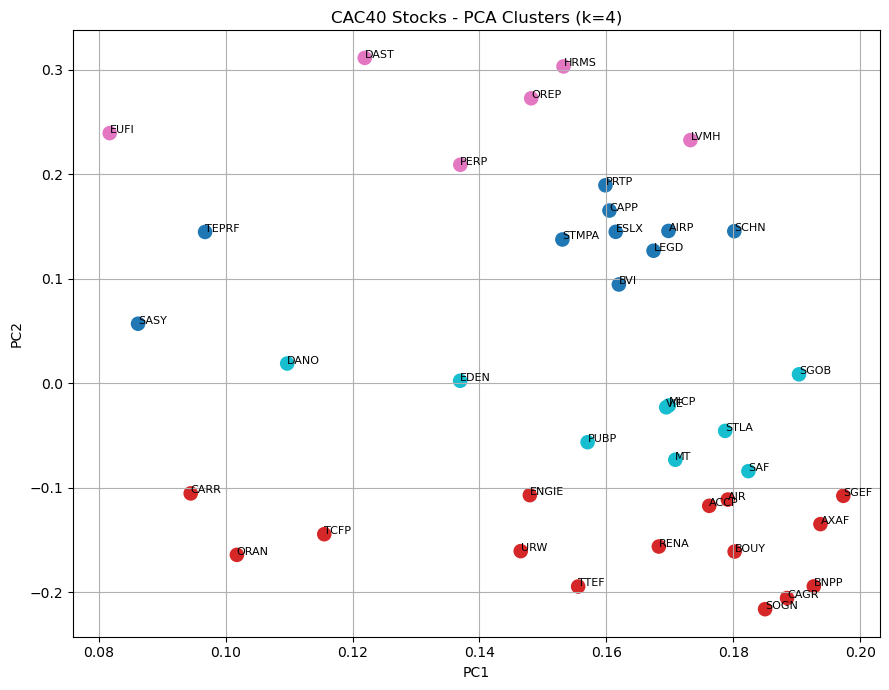

In [21]:
# Plot PCA clusters (PC1 vs PC2) with color coding
plt.figure(figsize=(9,7))

# Scatter: each point = a stock, color = cluster label
plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Cluster"],
    cmap="tab10",
    s=90
)

# Add ticker labels to each point
for ticker in pca_df.index:
    plt.text(
        pca_df.loc[ticker, "PC1"],
        pca_df.loc[ticker, "PC2"],
        ticker,
        fontsize=8
    )

plt.title("CAC40 Stocks - PCA Clusters (k=4)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Count how many stocks are inside each cluster
cluster_summary = pca_df["Cluster"].value_counts().sort_index()

print("Number of stocks per cluster:")
print(cluster_summary)


Number of stocks per cluster:
Cluster
0    10
1    15
2     6
3     9
Name: count, dtype: int64


In [23]:
# Hierarchical clustering uses PCA coordinates (PC1, PC2)
X_hc = pca_df[["PC1", "PC2"]]


In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering with Ward method
linked = linkage(X_hc, method='ward')


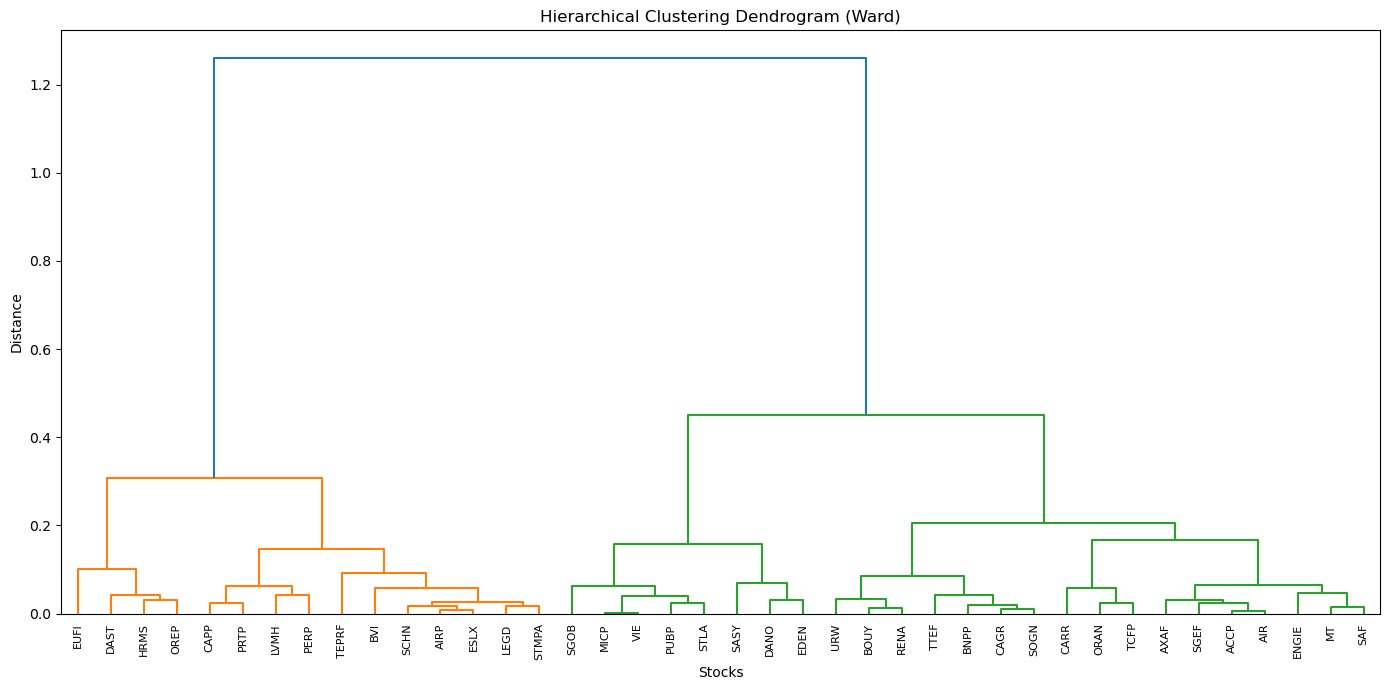

In [25]:
plt.figure(figsize=(14, 7))
dendrogram(
    linked,
    labels=pca_df.index.tolist(),   # stock tickers as labels
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.xlabel("Stocks")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [26]:
from scipy.cluster.hierarchy import fcluster

# Form 4 clusters from the hierarchical tree
hc_labels = fcluster(linked, t=4, criterion='maxclust')

# Add hierarchical cluster labels to PCA DataFrame
pca_df["HC_Cluster"] = hc_labels

pca_df.head()


PC1       PC2  Cluster  HC_Cluster
ACCP  0.176211 -0.117388        1           4
AIRP  0.169782  0.145773        0           2
AIR   0.179136 -0.111364        1           4
AXAF  0.193734 -0.134875        1           4
BNPP  0.192687 -0.194495        1           4

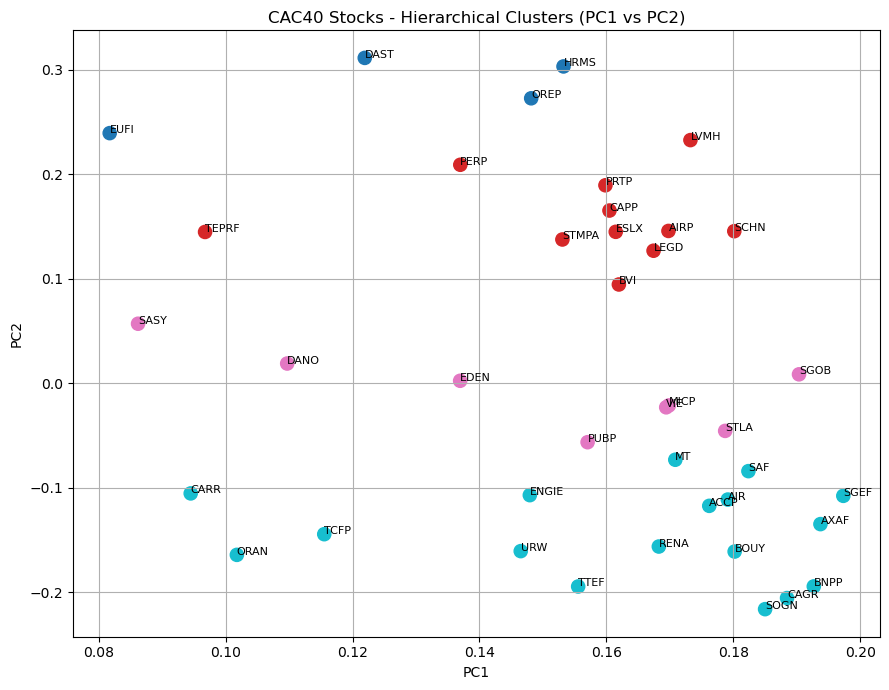

In [27]:
plt.figure(figsize=(9, 7))

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["HC_Cluster"],
    cmap="tab10",
    s=90
)

for ticker in pca_df.index:
    plt.text(
        pca_df.loc[ticker, "PC1"],
        pca_df.loc[ticker, "PC2"],
        ticker,
        fontsize=8
    )

plt.title("CAC40 Stocks - Hierarchical Clusters (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd

sector_data = {
    "Ticker": [
        "ACCP","AIRP","AIR","AXAF","BNPP","BOUY","BVI","CAGR","CAPP","CARR","DANO","DAST",
        "EDEN","ENGIE","ESLX","EUFI","HRMS","LEGD","LVMH","MICP","MT","ORAN","OREP","PERP",
        "PRTP","PUBP","RENA","SAF","SASY","SCHN","SGEF","SGOB","SOGN","STLA","STMPA",
        "TCFP","TEPRF","TTEF","URW","VIE"
    ],
    "Company": [
        "Accor","Airbus","Air Liquide","AXA","BNP Paribas","Bouygues","Bureau Veritas",
        "Crédit Agricole","Capgemini","Carrefour","Danone","Dassault Systèmes","Edenred",
        "Engie","EssilorLuxottica","Eurofins Scientific","Hermès","Legrand","LVMH","Michelin",
        "ArcelorMittal","Orange","Orpea","Pernod Ricard","Kering","Publicis Groupe","Renault",
        "Safran","Sanofi","Schneider Electric","Société Générale","Saint-Gobain","Sodexo",
        "Stellantis","STMicroelectronics","Teleperformance","Thales","TotalEnergies",
        "Unibail-Rodamco-Westfield","Veolia"
    ],
    "Sector": [
        "Consumer Discretionary","Industrials","Materials","Financials","Financials",
        "Industrials","Industrials","Financials","Information Technology","Consumer Staples",
        "Consumer Staples","Information Technology","Industrials","Utilities","Health Care",
        "Health Care","Consumer Discretionary","Industrials","Consumer Discretionary",
        "Consumer Discretionary","Materials","Communication Services","Health Care",
        "Consumer Staples","Consumer Discretionary","Communication Services","Consumer Discretionary",
        "Industrials","Health Care","Industrials","Financials","Industrials","Industrials",
        "Consumer Discretionary","Information Technology","Industrials","Industrials","Energy",
        "Real Estate","Utilities"
    ]
}

sector_df = pd.DataFrame(sector_data)
sector_df


Ticker                    Company                  Sector
0    ACCP                      Accor  Consumer Discretionary
1    AIRP                     Airbus             Industrials
2     AIR                Air Liquide               Materials
3    AXAF                        AXA              Financials
4    BNPP                BNP Paribas              Financials
5    BOUY                   Bouygues             Industrials
6     BVI             Bureau Veritas             Industrials
7    CAGR            Crédit Agricole              Financials
8    CAPP                  Capgemini  Information Technology
9    CARR                  Carrefour        Consumer Staples
10   DANO                     Danone        Consumer Staples
11   DAST          Dassault Systèmes  Information Technology
12   EDEN                    Edenred             Industrials
13  ENGIE                      Engie               Utilities
14   ESLX           EssilorLuxottica             Health Care
15   EUFI        Eurofins Scientific             Health Care
16   HRMS                     Hermès  Consumer Discretionary
17   LEGD                    Legrand             Industrials
18   LVMH                       LVMH  Consumer Discretionary
19   MICP                   Michelin  Consumer Discretionary
20     MT              ArcelorMittal               Materials
21   ORAN                     Orange  Communication Services
22   OREP                      Orpea             Health Care
23   PERP              Pernod Ricard        Consumer Staples
24   PRTP                     Kering  Consumer Discretionary
25   PUBP            Publicis Groupe  Communication Services
26   RENA                    Renault  Consumer Discretionary
27    SAF                     Safran             Industrials
28   SASY                     Sanofi             Health Care
29   SCHN         Schneider Electric             Industrials
30   SGEF           Société Générale              Financials
31   SGOB               Saint-Gobain             Industrials
32   SOGN                     Sodexo             Industrials
33   STLA                 Stellantis  Consumer Discretionary
34  STMPA         STMicroelectronics  Information Technology
35   TCFP            Teleperformance             Industrials
36  TEPRF                     Thales             Industrials
37   TTEF              TotalEnergies                  Energy
38    URW  Unibail-Rodamco-Westfield             Real Estate
39    VIE                     Veolia               Utilities

In [31]:
# Merge PCA coordinates with sector information
pca_sector = pca_df.copy()
pca_sector["Ticker"] = pca_sector.index

# Merge on ticker
pca_sector = pca_sector.merge(sector_df, on="Ticker", how="left")

# Restore ticker as index
pca_sector = pca_sector.set_index("Ticker")

pca_sector.head()


PC1       PC2  Cluster  HC_Cluster      Company  \
Ticker                                                         
ACCP    0.176211 -0.117388        1           4        Accor   
AIRP    0.169782  0.145773        0           2       Airbus   
AIR     0.179136 -0.111364        1           4  Air Liquide   
AXAF    0.193734 -0.134875        1           4          AXA   
BNPP    0.192687 -0.194495        1           4  BNP Paribas   

                        Sector  
Ticker                          
ACCP    Consumer Discretionary  
AIRP               Industrials  
AIR                  Materials  
AXAF                Financials  
BNPP                Financials

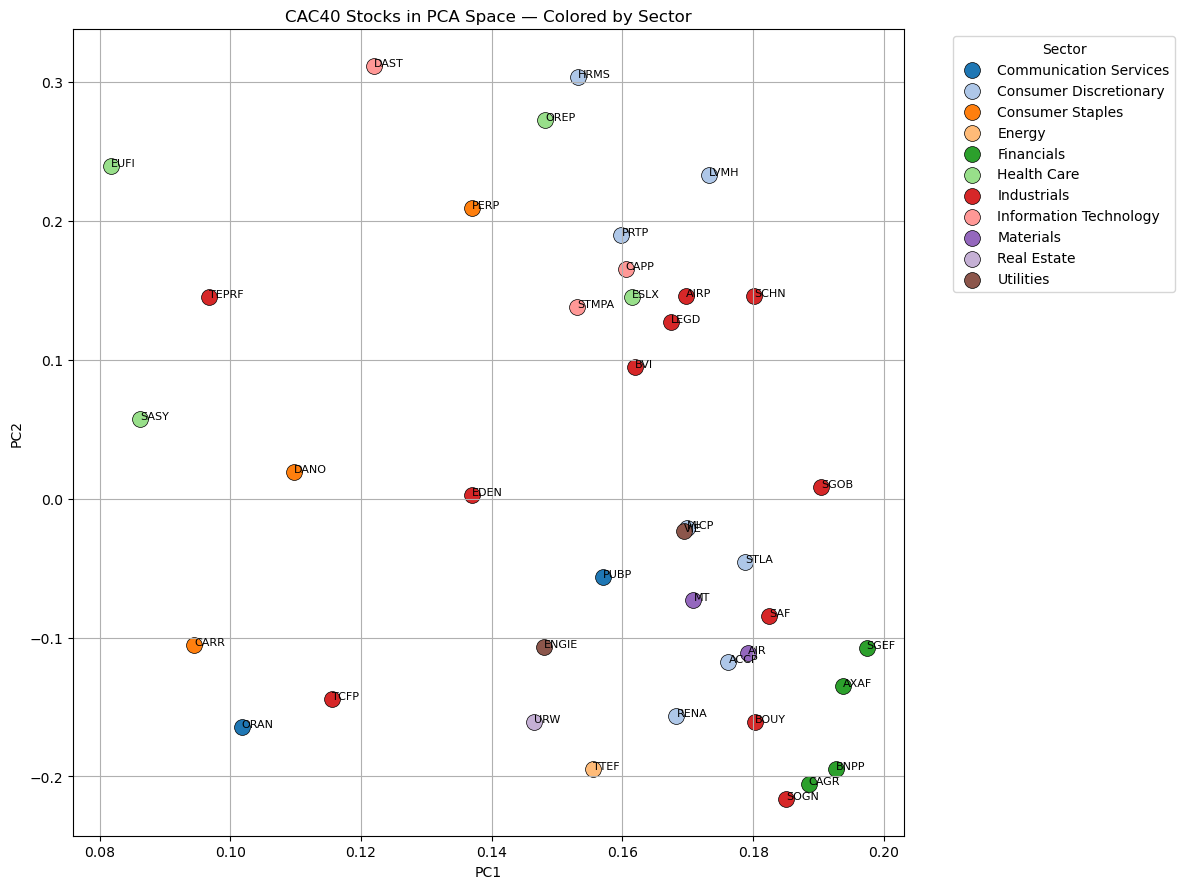

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

# Unique sectors (sorted)
unique_sectors = sorted(pca_sector["Sector"].unique())

# Use tab20 and manually create a list of colors
cmap = plt.get_cmap("tab20")
colors = [cmap(i) for i in range(len(unique_sectors))]

# Plot each sector with a distinct color
for i, sector in enumerate(unique_sectors):
    subset = pca_sector[pca_sector["Sector"] == sector]
    
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        s=130,
        color=colors[i],
        label=sector,
        edgecolor="black",
        linewidth=0.5
    )
    
    # Add ticker labels
    for ticker in subset.index:
        plt.text(
            subset.loc[ticker, "PC1"],
            subset.loc[ticker, "PC2"],
            ticker,
            fontsize=8
        )

plt.title("CAC40 Stocks in PCA Space — Colored by Sector")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
# Count number of tickers per sector
sector_count = sector_df["Sector"].value_counts().sort_index()

sector_count


Sector
Communication Services     2
Consumer Discretionary     7
Consumer Staples           3
Energy                     1
Financials                 4
Health Care                4
Industrials               11
Information Technology     3
Materials                  2
Real Estate                1
Utilities                  2
Name: count, dtype: int64

In [36]:
# 1. Build a cross-tab between Sector and Hierarchical Cluster
sector_hc_table = pd.crosstab(
    pca_sector["Sector"],
    pca_sector["HC_Cluster"]
)

sector_hc_table


HC_Cluster              1  2  3  4
Sector                            
Communication Services  0  0  1  1
Consumer Discretionary  1  2  2  2
Consumer Staples        0  1  1  1
Energy                  0  0  0  1
Financials              0  0  0  4
Health Care             2  1  1  0
Industrials             0  5  2  4
Information Technology  1  2  0  0
Materials               0  0  0  2
Real Estate             0  0  0  1
Utilities               0  0  1  1

In [37]:
# 2. Row-normalized table (percentage distribution)
sector_hc_pct = sector_hc_table.div(sector_hc_table.sum(axis=1), axis=0)
sector_hc_pct


HC_Cluster                     1         2         3         4
Sector                                                        
Communication Services  0.000000  0.000000  0.500000  0.500000
Consumer Discretionary  0.142857  0.285714  0.285714  0.285714
Consumer Staples        0.000000  0.333333  0.333333  0.333333
Energy                  0.000000  0.000000  0.000000  1.000000
Financials              0.000000  0.000000  0.000000  1.000000
Health Care             0.500000  0.250000  0.250000  0.000000
Industrials             0.000000  0.454545  0.181818  0.363636
Information Technology  0.333333  0.666667  0.000000  0.000000
Materials               0.000000  0.000000  0.000000  1.000000
Real Estate             0.000000  0.000000  0.000000  1.000000
Utilities               0.000000  0.000000  0.500000  0.500000

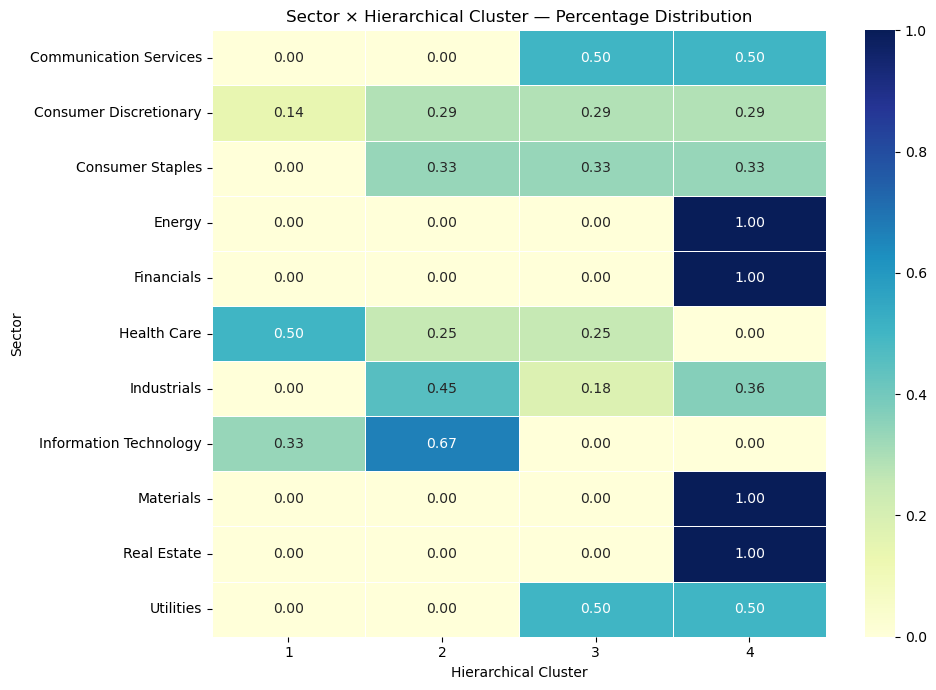

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(
    sector_hc_pct,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Sector × Hierarchical Cluster — Percentage Distribution")
plt.xlabel("Hierarchical Cluster")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

labels_true = pca_sector["Sector"]
labels_pred = pca_sector["HC_Cluster"]

homog = homogeneity_score(labels_true, labels_pred)
compl = completeness_score(labels_true, labels_pred)
v_meas = v_measure_score(labels_true, labels_pred)

print("=== SECTOR PURITY METRICS ===")
print(f"Homogeneity: {homog:.3f}")
print(f"Completeness: {compl:.3f}")
print(f"V-measure: {v_meas:.3f}")


=== SECTOR PURITY METRICS ===
Homogeneity: 0.208
Completeness: 0.351
V-measure: 0.261


In [44]:
# ============================================================
# SAVE ALL CSV FILES + SAVE ALL PLOTS
# ============================================================

import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create folders if they do not exist
os.makedirs("results_csv", exist_ok=True)
os.makedirs("results_plots", exist_ok=True)

# ------------------------------------------------------------
# 1. SAVE CSV FILES
# ------------------------------------------------------------

try:
    returns_matrix.to_csv("results_csv/returns_matrix.csv")
    print("Saved: returns_matrix.csv")
except:
    print("returns_matrix NOT FOUND")

try:
    correlation_matrix.to_csv("results_csv/correlation_matrix.csv")
    print("Saved: correlation_matrix.csv")
except:
    print("correlation_matrix NOT FOUND")

try:
    beta_table.to_csv("results_csv/beta_table.csv")
    print("Saved: beta_table.csv")
except:
    print("beta_table NOT FOUND")

try:
    pca_df.to_csv("results_csv/pca_components.csv")
    print("Saved: pca_components.csv")
except:
    print("pca_df NOT FOUND")

try:
    pca_sector.to_csv("results_csv/pca_with_sectors.csv")
    print("Saved: pca_with_sectors.csv")
except:
    print("pca_sector NOT FOUND")

print("\n--- CSV SAVING DONE ---\n")

# ------------------------------------------------------------
# 2. SAVE PLOTS
# ------------------------------------------------------------

# === CORRELATION HEATMAP ===
try:
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
    plt.title("Correlation Matrix Heatmap – CAC40")
    plt.savefig("results_plots/correlation_heatmap.png", dpi=300, bbox_inches="tight")
    plt.close()
    print("Saved: correlation_heatmap.png")
except:
    print("FAILED: correlation heatmap")

# === PCA WITH HIERARCHICAL CLUSTERS ===
try:
    plt.figure(figsize=(9, 7))
    plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["HC_Cluster"], cmap="tab10", s=90)
    for ticker in pca_df.index:
        plt.text(pca_df.loc[ticker, "PC1"], pca_df.loc[ticker, "PC2"], ticker, fontsize=8)
    plt.title("PCA – Hierarchical Clusters")
    plt.savefig("results_plots/pca_hierarchical_clusters.png", dpi=300, bbox_inches="tight")
    plt.close()
    print("Saved: pca_hierarchical_clusters.png")
except:
    print("FAILED: PCA cluster plot")

# === PCA COLORED BY SECTOR ===
try:
    plt.figure(figsize=(12, 9))
    unique_sectors = sorted(pca_sector["Sector"].unique())
    cmap = plt.get_cmap("tab20")
    colors = [cmap(i) for i in range(len(unique_sectors))]

    for i, sector in enumerate(unique_sectors):
        subset = pca_sector[pca_sector["Sector"] == sector]
        plt.scatter(
            subset["PC1"],
            subset["PC2"],
            s=130,
            color=colors[i],
            label=sector,
            edgecolor="black",
            linewidth=0.5
        )
        for ticker in subset.index:
            plt.text(subset.loc[ticker, "PC1"], subset.loc[ticker, "PC2"], ticker, fontsize=8)

    plt.title("PCA – Colored by Sector")
    plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.savefig("results_plots/pca_by_sector.png", dpi=300, bbox_inches="tight")
    plt.close()
    print("Saved: pca_by_sector.png")
except:
    print("FAILED: PCA by sector plot")

print("\n=== ALL SAVING DONE ===")


Saved: returns_matrix.csv
Saved: correlation_matrix.csv
Saved: beta_table.csv
Saved: pca_components.csv
Saved: pca_with_sectors.csv

--- CSV SAVING DONE ---

Saved: correlation_heatmap.png
Saved: pca_hierarchical_clusters.png
Saved: pca_by_sector.png

=== ALL SAVING DONE ===


In [27]:
pca_df["Cluster"].value_counts()


Cluster
1    15
0    10
3     9
2     6
Name: count, dtype: int64